Ejercicio de Regresión Logistica

Wilson Valderrama

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
logistica = pd.read_csv("c:/datos/framingham.csv")

In [45]:
logistica.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [41]:
logistica[['age','diabetes']].head()

,age,diabetes
0,39,0
1,46,0
2,48,0
3,61,0
4,46,0


<Axes: xlabel='age', ylabel='diabetes'>

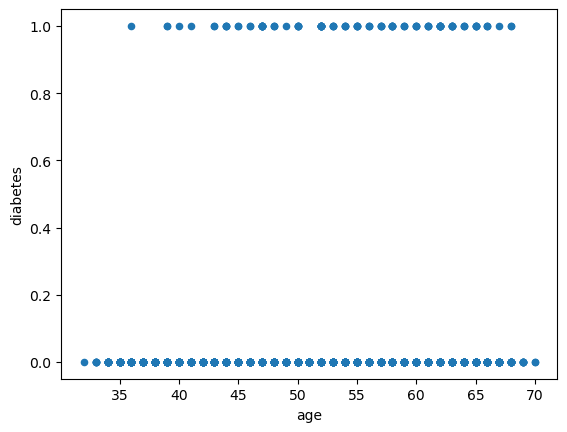

In [42]:
logistica[['age','diabetes']].plot.scatter(x='age',y='diabetes')

In [49]:
w = 0.1
b = -3.7

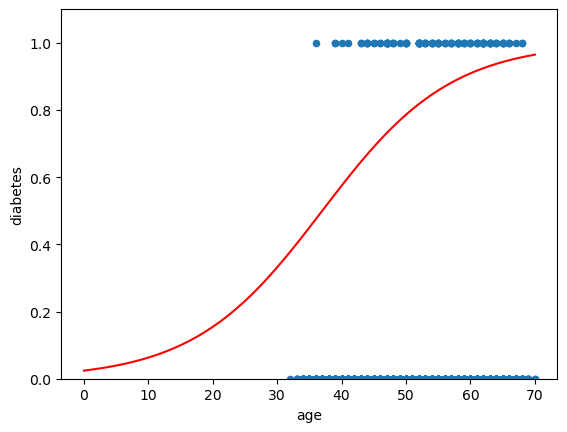

In [50]:
# puntos de la recta
x = np.linspace(0,logistica['age'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
logistica.plot.scatter(x='age',y='diabetes')
plt.plot(x, y, '-r')
plt.ylim(0,logistica['diabetes'].max()*1.1)
# plt.grid()
plt.show()

In [54]:
logistica['sigmoid'] = 1/(1+np.exp(-(logistica['age']*w+b)))

In [55]:
logistica['loss_xi'] = -logistica['diabetes']*np.log(logistica['sigmoid'])-(1-logistica['diabetes'])*np.log(1-logistica['sigmoid'])
cost_j = logistica['loss_xi'].mean()
cost_j

1.5233030968134287

In [56]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [57]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [60]:
def sum_error_df(df):
    logistica['sigmoid'] = 1/(1+np.exp(-(logistica['age']*df['w']+df['b'])))
    logistica['loss_xi'] = -logistica['diabetes']*np.log(logistica['sigmoid'])-(1-logistica['diabetes'])*np.log(1-logistica['sigmoid'])
    j_cost = logistica['loss_xi'].mean()
    return(j_cost)

In [61]:
df['error'] = df.apply(sum_error_df, axis=1)

In [62]:
df.sort_values(by=['error']).head()

,w,b,error
0,0.05,-4.00,0.243736
1,0.05,-3.99,0.245364
2,0.05,-3.98,0.247008
3,0.05,-3.97,0.248667
4,0.05,-3.96,0.250340


In [64]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [65]:

df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,0.243736,0.245364,0.247008,0.248667,0.250340,0.252029,0.253733,0.255453,0.257188,0.258938,...,0.460120,0.463428,0.466757,0.470108,0.473481,0.476877,0.480295,0.483735,0.487198,0.490683
0.06,0.350681,0.353186,0.355711,0.358255,0.360818,0.363400,0.366001,0.368622,0.371262,0.373922,...,0.659925,0.664381,0.668861,0.673363,0.677890,0.682439,0.687012,0.691609,0.696229,0.700872
0.07,0.508642,0.512195,0.515769,0.519364,0.522982,0.526621,0.530283,0.533966,0.537672,0.541399,...,0.918618,0.924210,0.929824,0.935460,0.941118,0.946799,0.952503,0.958228,0.963976,0.969745
0.08,0.723203,0.727870,0.732560,0.737272,0.742006,0.746763,0.751542,0.756344,0.761168,0.766015,...,1.231508,1.238116,1.244744,1.251392,1.258059,1.264746,1.271452,1.278178,1.284922,1.291686
0.09,0.993772,0.999512,1.005273,1.011056,1.016859,1.022683,1.028529,1.034396,1.040283,1.046192,...,1.589944,1.597395,1.604863,1.612346,1.619845,1.627360,1.634891,1.642438,1.650001,1.657579


In [66]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

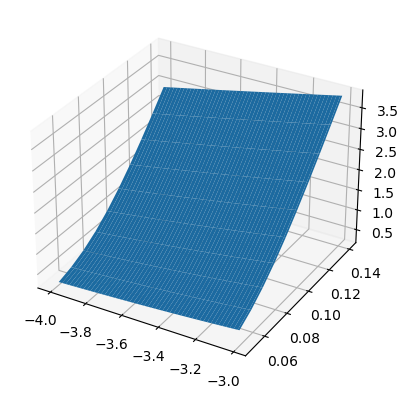

In [67]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

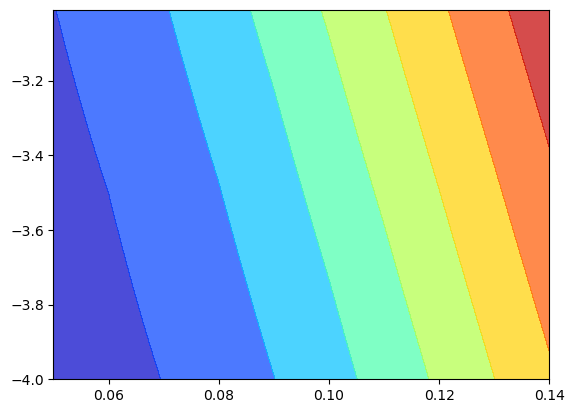

In [68]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)